In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"Desktop\housing.csv")
#print(df)
print(list(df.keys()))

['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285629,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703285,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


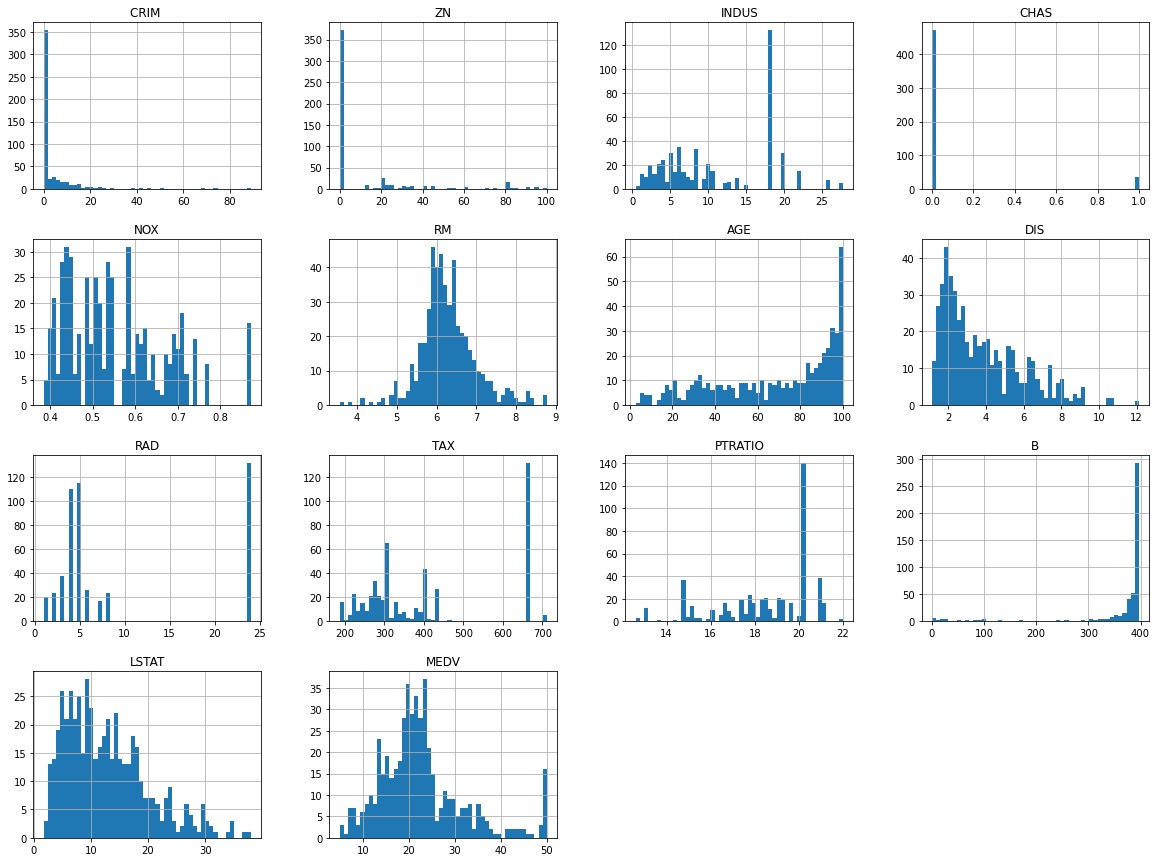

In [7]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)
print("rows in test set=" , len(test_set))
print("rows in train set=",len(train_set))

rows in test set= 102
rows in train set= 404


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["CHAS"]):
    strat_train_set=df.iloc[train_index]
    strat_test_set=df.iloc[test_index]

In [10]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [11]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
df=strat_train_set.copy()

In [13]:
corr_matrix=df.corr()

In [14]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.678607
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

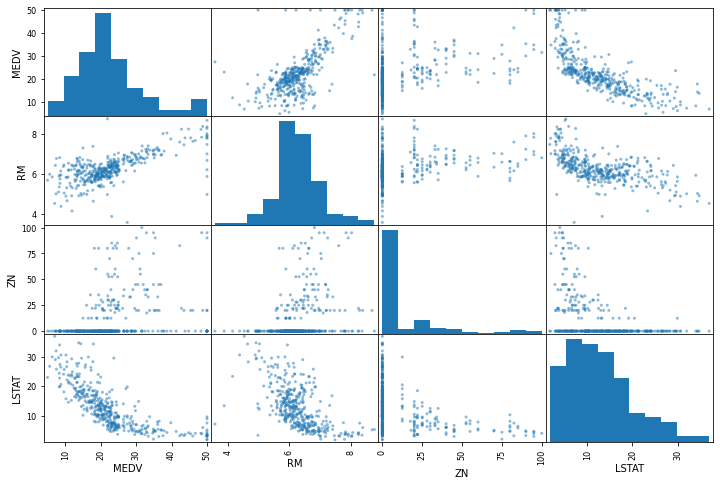

In [15]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

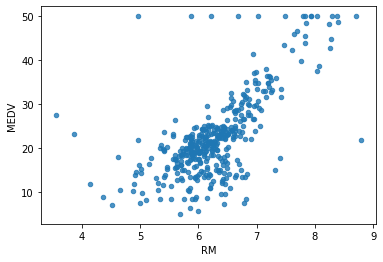

In [16]:
df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [17]:
#df["tax_per_room"]=df["TAX"]/df["RM"]

In [18]:
#df["tax_per_room"]

In [19]:
#df.head()

In [20]:
#df.plot(kind="scatter",x="tax_per_room",y="MEDV",alpha=0.8)

In [21]:
df=strat_train_set.drop("MEDV",axis=1)
df_label=strat_train_set["MEDV"].copy()


In [22]:
#To fill the null values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [24]:
 X=imputer.transform(df)
X

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [25]:
df_fill=pd.DataFrame(X,columns=df.columns)
df_fill.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


In [26]:
df_fill.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278634,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710419,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [28]:
df_num=pipeline.fit_transform(df_fill)

In [29]:
#dff=pd.DataFrame(df_num,columns=df.columns)
#dff.head()
df_num

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [30]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(df_num,df_label)

RandomForestRegressor()

In [31]:
some_data=df.iloc[:5]

In [32]:
some_label=df_label.iloc[:5]

In [33]:
prepared_data=pipeline.transform(some_data)

In [34]:
model.predict(prepared_data)

array([22.344, 25.412, 16.597, 23.247, 23.705])

In [35]:
from sklearn.metrics import mean_squared_error
predictions=model.predict(df_num)
error=mean_squared_error(df_label,predictions)
root_error=np.sqrt(error)

In [36]:
root_error

1.206638484869563

In [37]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,df_num,df_label,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [38]:
rmse_scores

array([2.97928502, 2.57789786, 4.56238365, 2.49181893, 3.2691246 ,
       2.65205703, 4.90917706, 3.75107188, 3.05996035, 3.02830318])

In [39]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [40]:
print_scores(rmse_scores)

Scores:  [2.97928502 2.57789786 4.56238365 2.49181893 3.2691246  2.65205703
 4.90917706 3.75107188 3.05996035 3.02830318]
Mean:  3.3281079555838593
Standard Deviation:  0.7879274326289073


In [41]:
from joblib import dump,load
dump(model,'First_model.joblib')

['First_model.joblib']

In [42]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_prepared_test=pipeline.transform(x_test)
final_predictions=model.predict(x_prepared_test)
final_error=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_error)

In [43]:
final_rmse

2.839260739879238

In [44]:
features=np.array([[0.00632,1800000000.0,2.31,0,0.538999,6.575,6500.2,4.0900,1,296,15.3,396.90,-40000.98]])
model.predict(features)

array([37.043])